# Analysis of DNA-MERFISH for CTP11

by Pu Zheng

2022.02.15

analysis for dataset:

\\10.245.74.158\Chromatin_NAS_1\20220307-P_brain_CTP11_from_0303

This data is DNA of uncleared MERFISH RNA:
    \\10.245.74.158\Chromatin_NAS_0\20220303-P_brain_M1_nonclear_adaptor


In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

2328


# 0. fov parameters

In [19]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_4\20220402-P_brain_CTP11-13_from_0329',
             'save_folder':r'D:\Pu_Temp\20220402-P_brain_CTP11-13_from_0329_warp',
             'experiment_type': 'DNA',
             'num_threads': 16,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 800,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

# 1. Process Fov

In [20]:
_overwrite = False

_save_images = True

_fit_spots = True

_warp_images = True

_fov_id = 10

fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          _save_info_to_file=False, # whether overwrite
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 18
- Number of field of views: 161
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20220402-P_brain_CTP11-13_from_0329\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50C51', 'H51C52', 'H52C53', 'H53C54', 'H54C55', 'H55C56', 'H56C57', 'H57C58', 'H58C59', 'H59C60', 'H60C61', 'H61C62', 'H62C63', 'H63C64', 'H64C65', 'H65C66', 'H66C67', 'H67U1', 'H68U2', 'H69U3', 'H70U4', 'H71U5', 'H

In [21]:
# 2. Process image into candidate spots
fov.parallel = False
fov.combo_ref_id = 0
fov._process_image_to_spots('combo', 
                            _load_common_reference=True, _load_with_multiple=False,
                            _save_images=_save_images,
                            _warp_images=_warp_images, 
                            _fit_spots=_fit_spots,
                            _overwrite_drift=False, _overwrite_image=_overwrite,
                            _overwrite_spot=_overwrite,
                            _verbose=True)

-- folders not selected, allow processing all 18 folders
-- checking combo, region:[ 1  2 67] in 0.029s.
-- checking combo, region:[101 102 165] in 0.030s.
-- checking combo, region:[ 3  4 68] in 0.027s.
-- checking combo, region:[ 5  6 69] in 0.028s.
-- checking combo, region:[ 7  8 70] in 0.026s.
-- checking combo, region:[ 9 10 71] in 0.027s.
-- checking combo, region:[11 12 72] in 0.027s.
-- checking combo, region:[13 14 73] in 0.028s.
-- checking combo, region:[15 16 74] in 0.027s.
-- checking combo, region:[17 18 75] in 0.026s.
-- checking combo, region:[19 20 76] in 0.027s.
-- checking combo, region:[21 22 77] in 0.031s.
-- checking combo, region:[23 24 78] in 0.025s.
-- checking combo, region:[25 26 79] in 0.027s.
-- checking combo, region:[27 28 80] in 0.025s.
-- checking combo, region:[29 30 81] in 0.026s.
-- checking combo, region:[31 32 82] in 0.026s.
-- checking combo, region:[33 34 83] in 0.026s.
+ Start sequential pre-processing for 1 images
++ processed combo ids: [33 3

In [16]:
with h5py.File(fov.save_filename, 'r') as _f:
    _grp = _f.require_group('combo')
    _ids = list(_grp['ids'][:])
    _flags = _grp['flags'][:]
    sel_inds = np.where(_flags)[0]
    sel_ims = []
    sel_raw_spots = []
    #
    for _ind in sel_inds:   
        sel_ims.append(_grp['ims'][_ind])
        sel_raw_spots.append(_grp['raw_spots'][_ind])

In [110]:
reload(ia.classes.preprocess)

<module 'ImageAnalysis3.classes.preprocess' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\classes\\preprocess.py'>

In [142]:
#dax_filename = r'\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H50C51\Conv_zscan_020.dax'
dax_filename = os.path.join(fov.data_folder[0], fov.annotated_folders[1], fov.fov_name)
_cls = ia.classes.preprocess.DaxProcesser(dax_filename, CorrectionFolder=fov.correction_folder, DriftChannel=488, DapiChannel=405)
_cls._load_image()

Initialize DaxProcesser for file:\\10.245.74.158\Chromatin_NAS_4\20220402-P_brain_CTP11-13_from_0329\H1C2\Conv_zscan_010.dax
-- all used channels: ['750', '647', '561', '488']
-- single image size: [  50 2048 2048]
- Loaded images for channel ['750', '647', '561', '488'] in 15.328s.


In [143]:
_cls._corr_bleedthrough()

- Start bleedthrough correction for channels:['750', '647', '561'].
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_561_2048_2048.npy
-- corrected bleedthrough for channel 750 in 14.575s.
-- corrected bleedthrough for channel 647 in 14.290s.
-- corrected bleedthrough for channel 561 in 14.580s.
-- finish bleedthrough correction in 46.364s. 


In [144]:
_cls._corr_illumination()

- Start illumination correction for channels:['750', '647', '561', '488'].
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- corrected illumination for channel 750 in 10.577s.
-- corrected illumination for channel 647 in 10.817s.
-- corrected illumination for channel 561 in 11.157s.
-- corrected illumination for channel 488 in 10.488s.
- Finished illumination correction in 44.567s.


In [145]:
_cls._corr_chromatic_functions()

- Start chromatic correction for channels:['750', '647', '561'].
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048_const.pkl
	 647 None
	 561 chromatic_correction_561_647_50_2048_2048_const.pkl
-- generate chromatic_shift_function for channel: 750 in 0.000s
-- generate chromatic_shift_function for channel: 647 in 0.000s
-- generate chromatic_shift_function for channel: 561 in 0.000s
-- finish generating chromatic functions in 0.142s


In [146]:
#ref_filename = r'\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_020.dax'

ref_filename = os.path.join(fov.data_folder[0], fov.annotated_folders[0], fov.fov_name)
dft_ref_im = _cls._calculate_drift(ref_filename, precise_align=True)

+ Calculate drift with drift_channel: 488
Initialize DaxProcesser for file:\\10.245.74.158\Chromatin_NAS_4\20220402-P_brain_CTP11-13_from_0329\H0C1\Conv_zscan_010.dax
-- all used channels: ['750', '647', '561', '488', '405']
- Loaded images for channel ['488'] in 16.383s.
-- start aligning given source image to given reference image.
-- drift 0: [-0.05  2.52 -0.85] in 2.634s.
-- drift 1: [-0.04  2.77 -1.06] in 2.217s.
-- drift 2: [-0.07  2.94 -1.42] in 2.155s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.


In [150]:
#%%time
reload(ia.io_tools.load)
warpped_ims = warp_image(_cls, save_attrs=False)

- Start warpping images channels:['750', '647', '561', '488'].
-- loading chromatic correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048.npy
	 647 None
	 561 chromatic_correction_561_647_50_2048_2048.npy
-- warp image with drift with chromatic abbrevation for channel: 750
-- finish warpping channel 750 in 77.358s.
-- warp image with drift for channel: 647
-- finish warpping channel 647 in 77.839s.
-- warp image with drift with chromatic abbrevation for channel: 561
-- finish warpping channel 561 in 77.506s.
-- warp image with drift for channel: 488
-- finish warpping channel 488 in 77.796s.


In [149]:
from scipy.ndimage.interpolation import shift, map_coordinates
def warp_image(self,
               drift=None,
               correction_channels=None,
               corr_chromatic=True, chromatic_pf=None,
               correction_folder=None,
               ref_channel=default_ref_channel,
               rescale=True,
               save_attrs=True,
               ):
    """Warp image in 3D, this step must give a drift"""
    if drift is not None:
        _drift = np.array(drift)
    elif hasattr(self, 'drift'):
        _drift = getattr(self, 'drift')
    else:
        raise ValueError(f"drift not given to warp image. ")
    
    _total_chromatic_start = time.time()
    if correction_channels is None:
        if hasattr(self, 'sel_channels'):
            correction_channels = self.sel_channels
        else:
            correction_channels = self.channels
    _correction_channels = [str(_ch) for _ch in correction_channels]
    _chromatic_channels = [_ch for _ch in _correction_channels 
                           if _ch != getattr(self, 'drift_channel', None) and _ch != getattr(self, 'dapi_channel', None)]
    if self.verbose:
        print(f"- Start warpping images channels:{_correction_channels}.")
    if correction_folder is None:
        correction_folder = self.correction_folder
    # load chromatic warp
    if corr_chromatic and chromatic_pf is None:
        chromatic_pf = ia.io_tools.load.load_correction_profile(
            'chromatic', _chromatic_channels,
            correction_folder=correction_folder,
            all_channels=self.channels,
            ref_channel=ref_channel,
            im_size=self.image_size,
            verbose=self.verbose,
        )
            
    # init corrected_ims
    _corrected_ims = []
    # do warpping
    for _ch in _correction_channels:
        _chromatic_time = time.time()
        # get image
        _im = getattr(self, f"im_{_ch}", None)
        if _im is None:
            if self.verbose:
                print(f"-- skip warpping image for channel {_ch}, image not detected.")
            continue
        # 1. get coordiates to be mapped
        _coords = np.meshgrid(np.arange(self.image_size[0]), 
                              np.arange(self.image_size[1]), 
                              np.arange(self.image_size[2]), 
                              )
        # transpose is necessary  
        _coords = np.stack(_coords).transpose((0, 2, 1, 3)) 
        _note = f"-- warp image"
        _change_flag = False
        # 2. apply drift if necessary
        if _drift.any():
            _coords = _coords - _drift[:, np.newaxis,np.newaxis,np.newaxis]
            _note += ' with drift'
            _change_flag = True
        # 3. aaply chromatic if necessary
        if corr_chromatic and _ch in _chromatic_channels and chromatic_pf[_ch] is not None:
            _note += ' with chromatic abbrevation'                
            _coords = _coords + chromatic_pf[_ch]
            _change_flag = True
        # 4. map coordinates
        if self.verbose:
            print(f"{_note} for channel: {_ch}")
        if _change_flag:
            _im = map_coordinates(_im, 
                                  _coords.reshape(_coords.shape[0], -1),
                                  mode='nearest').astype(_im.dtype)
            _im = _im.reshape(tuple(self.image_size))
        else:
            if self.verbose:
                print("--- skip")
        # 5. save
        if save_attrs:
            setattr(self, f"im_{_ch}", _im,)
        else:
            _corrected_ims.append(_im)
        # release RAM
        del(_im)
        # print time
        if self.verbose:
            print(f"-- finish warpping channel {_ch} in {time.time()-_chromatic_time:.3f}s.")
    if save_attrs:
        return
    else:
        return _corrected_ims, _correction_channels

In [139]:
_cls.drift

array([0., 0., 0.])

<IPython.core.display.Javascript object>


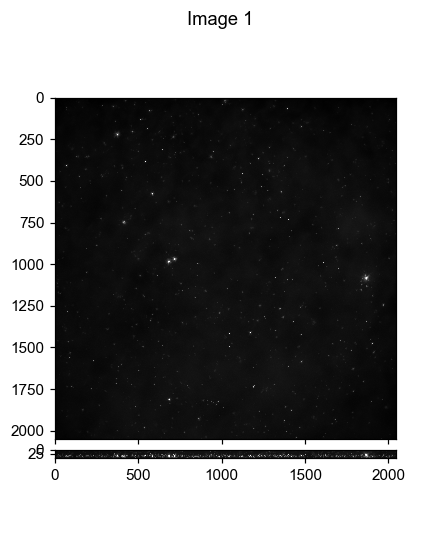

In [37]:
visual_tools.imshow_mark_3d_v2([_cls.ref_im, _cls.im_488])

In [38]:
_cls._corr_bleedthrough(correction_channels=_cls.channels[:3])

- Start bleedthrough correction for channels:['750', '647', '561'].
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_561_2048_2048.npy
float64
float64
uint16
-- corrected bleedthrough for channel 750 in 10.154s.
float64
float64
uint16
-- corrected bleedthrough for channel 647 in 10.672s.
float64
float64
uint16
-- corrected bleedthrough for channel 561 in 10.686s.


In [ ]:
6,124,348
7,762,952
7,762,980
12,809,284
illumination
12809284 - 7762952

In [30]:
9508000-4122980

5385020

<IPython.core.display.Javascript object>


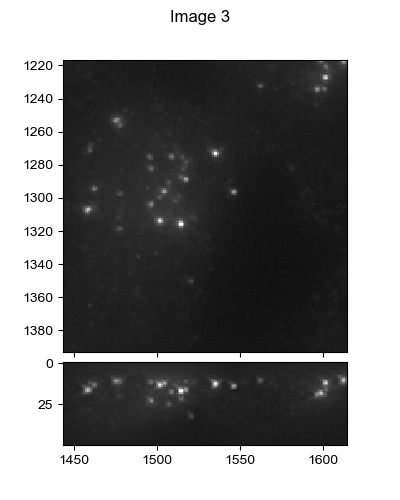

In [31]:
visual_tools.imshow_mark_3d_v2([_cls.im_750, _cls.im_647, _cls.im_561])

In [8]:
_cls._corr_illumination()

- Start illumination correction for channels:['750', '647', '561', '488'].
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
uint16
float64
float64
-- corrected illumination for channel 750 in 4.781s.
uint16
float64
float64
-- corrected illumination for channel 647 in 4.781s.
uint16
float64
float64
-- corrected illumination for channel 561 in 4.750s.
uint16
float64
float64
-- corrected illumination for channel 488 in 4.843s.
- Finished illumination correction in 19.584s.


65535

<IPython.core.display.Javascript object>


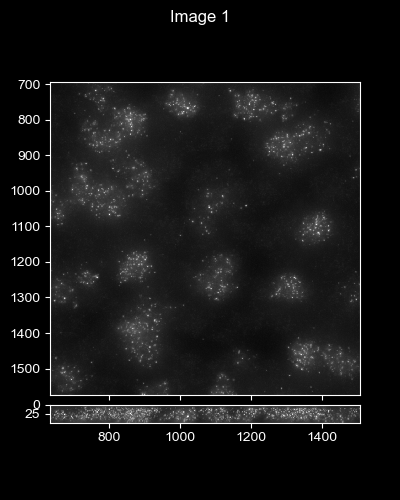

In [34]:
visual_tools.imshow_mark_3d_v2([_cls.im_750[]])

In [92]:
DaxProcesser._FindImageShape(dax_filename)

-- used channels: ['750', '647', '561', '488']
-- single image size: [  50 2048 2048]


array([  50, 2048, 2048])

In [73]:

        
_LoadInfFile(dax_filename.replace('.dax','.inf'))

{'binning': '1 x 1',
 'data type': '16 bit integers (binary, little endian)',
 'frame dimensions': '2048 x 2048',
 'number of frames': '200',
 'x_start': '1',
 'x_end': '2048',
 'y_start': '1',
 'y_end': '2048'}

In [30]:
_hal_info

<Element 'settings' at 0x0000021B000D4F48>

E:\Users\puzheng\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: This search is broken in 1.3 and earlier, and will be fixed in a future version.  If you rely on the current behaviour, change it to './illumination/shutters'
  """Entry point for launching an IPython kernel.


In [49]:
shutter_filename

'C:\\Users\\neoSTORM6\\Documents\\STORM6\\storm_control\\hal4000\\shutter_750_647_561_488_s50.xml'

['647']

In [64]:

_FindDaxChannels(dax_filename)

<Element 'settings' at 0x0000021B70F26638>
C:\Users\neoSTORM6\Documents\STORM6\storm_control\hal4000\shutter_750_647_561_488_s50.xml


['750', '647', '561', '488']

In [ ]:

sel_fov_ids = np.arange(19, 20) # batch1 in franklin

for _fov_id in sel_fov_ids:
    
    if 'bad_fovs_ids' in locals() and  _fov_id in bad_fovs_ids:
        continue
    

    
    # 2. Process image into candidate spots
    fov.parallel = True
    fov.combo_ref_id = 0
    fov._process_image_to_spots('combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=False, 
                                _fit_spots=_fit_spots,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite,
                                _verbose=True)
    # 3. Process image into candidate spots
    #fov.unique_ref_id = 0
    #fov._process_image_to_spots('unique', 
    #                            _load_common_reference=True, _load_with_multiple=False,
    #                            _save_images=_save_images, _warp_images=False, _verbose=True)
    # 4. Process DAPI image
    fov._load_dapi_image()

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 12
- Number of field of views: 168
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0U1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50C51', 'H51C52', 'H52C53', 'H53C54', 'H54C55', 'H55C56', 'H56C57', 'H57C58', 'H58C59', 'H59C60', 'H60C61', 'H61C62', 'H62C63', 'H63C64', 'H64C65', 'H65C66', 'H66U2', 'H67U3', 'H68U4', 'H69U5', 'H70U6', 'H71U7', 

In [22]:
    fov._load_dapi_image()

-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_020.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_020.dax  in 45.859s
-- removing hot pixels for channels:['405'] in 12.828s
-- illumination correction for channels: 405, in 4.157s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 64.031s
-- saving fov_info to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304_warp\Conv_zscan_020.hdf5
++ base attributes saved:['dapi_im'] in 9.732s.


array([[[ 4218,  4294,  4253, ...,  2962,  2745,  2729],
        [ 4419,  4280,  4069, ...,  2823,  2773,  2756],
        [ 4437,  4364,  4095, ...,  3169,  2853,  2706],
        ...,
        [13055, 12663, 12271, ..., 11717, 11431, 12096],
        [12399, 12399, 12364, ..., 11371, 11458, 11957],
        [12675, 12668, 12558, ..., 11199, 11445, 12123]],

       [[ 4034,  3955,  3649, ...,  2890,  2715,  2756],
        [ 4031,  3771,  3982, ...,  2820,  2962,  2751],
        [ 4575,  3811,  4160, ...,  2808,  2706,  2431],
        ...,
        [12262, 12287, 11820, ..., 11874, 11510, 11588],
        [12162, 11941, 11981, ..., 11289, 11217, 11957],
        [12594, 12587, 12482, ..., 11694, 11697, 11949]],

       [[ 4221,  4142,  3885, ...,  2790,  2557,  2731],
        [ 3923,  3503,  4025, ...,  2659,  2631,  2526],
        [ 3995,  4041,  3800, ...,  2575,  2678,  2606],
        ...,
        [13055, 12738, 12047, ..., 11556, 11990, 11842],
        [12399, 12856, 11752, ..., 12011, 114

In [ ]:
sel_ids = np.array([3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,68,69,70,71,72,73,74,75,76,101,102,165])



    for _id in sel_ids:
        _ind = _ids.index(_id)


In [6]:
with h5py.File(fov.save_filename, 'r') as _f:
    _grp = _f.require_group('combo')
    _ids = list(_grp['ids'][:])
    _flags = _grp['flags'][:]
    

In [7]:
_flags

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [17]:
sel_ids = np.array([3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,68,69,70,71,72,73,74,75,76,101,102,165])

with h5py.File(fov.save_filename, 'r') as _f:
    _grp = _f.require_group('combo')
    _ids = list(_grp['ids'][:])
    sel_ims = []
    sel_raw_spots = []
    for _id in sel_ids:
        _ind = _ids.index(_id)
        sel_ims.append(_grp['ims'][_ind])
        sel_raw_spots.append(_grp['raw_spots'][_ind])

In [17]:
coord_dict = {
    'coords': [],#np.fliplr(sel_spots[:,1:4]),
    'class_ids': [],#sel_ids,
}

for _i, _spots in enumerate(sel_raw_spots):
    _spots = _spots[_spots[:,0]>0]
    if len(_spots) > 0:
        coord_dict['coords'].extend(list(np.fliplr(_spots[:,1:4])))
        #coord_dict['coords'].extend(list(np.fliplr(_crop.crop_coords(_spots.to_coords()[_sel_inds]))))
        coord_dict['class_ids'].extend(list(np.ones(len(_spots),dtype=np.int32) * _i))
    

In [32]:
plt.style.use('dark_background')

In [33]:
visual_tools.imshow_mark_3d_v2(sel_ims, given_dic=coord_dict, image_names=sel_inds)

NameError: name 'sel_ims' is not defined

In [20]:
_bits = np.array(_ids)[sel_inds]

<IPython.core.display.Javascript object>


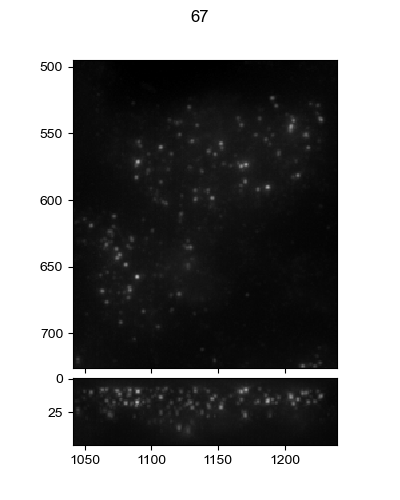

In [29]:
visual_tools.imshow_mark_3d_v2([fov.dapi_im]+list(sel_ims), 
                               image_names=['dapi']+list(_bits), 
                               min_max_default=[2000,15000])